In [1]:
import sys
sys.path.insert(0 , '/home/arpit/study/ML/github')

In [2]:
import mglearn

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
#importing the dataset
X , y = mglearn.datasets.make_forge()

In [5]:
#details of X
print("Shape of X : \n" , X.shape)
print("Shape of y : \n" , y.shape)

Shape of X : 
 (26, 2)
Shape of y : 
 (26,)


In [6]:
#plotting the graph depicting the knn classification
from sklearn.metrics import euclidean_distances

In [7]:
#this function is used to plot the data set
def plot_dataset() :
    #this is to plot the training set
    pos_indices = (y == 1)
    pos_data = np.ones((0 , 2))
    neg_data = np.ones((0 , 2))
    for indices in range(X.shape[0]):
        if (pos_indices[indices] == True):
            pos_data = np.vstack ((pos_data , np.array([X[indices][0] , X[indices][1]])))
        else:
            neg_data = np.vstack ((neg_data , np.array([X[indices][0] , X[indices][1]])))

    plt.plot(pos_data[: , 0] , pos_data[: , 1] , 'r^' , label = "class 1")
    plt.plot(neg_data[: , 0] , neg_data[: , 1] , 'bo' , label = "class 0")

    plt.xlabel("First feature")
    plt.ylabel("second feature")

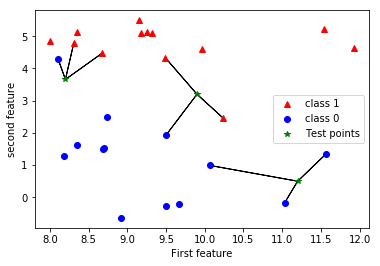

In [17]:
X_test = np.array([[8.2 , 3.66] , [9.9 , 3.2] , [11.2 , 0.5]])

dist = euclidean_distances(X , X_test)               #pairwise distace between each pair of test set and X
closest = np.argsort(dist , axis = 0)                #this will give you the indices of the closest neighbors

#plotting the data set
plot_dataset()
plt.plot(X_test[: , 0] , X_test[: , 1] , 'g*' , label = 'Test points')
plt.legend()

#plotting the k nearest neighborst showing them with the arrows
K = 3                                                   #this is the value that controls the number of negibors
for k in range(K):
    for indices , x in zip(range(3) , X_test):
        plt.arrow(x[0] , x[1] , X[closest[k , indices] , 0] - x[0] , X[closest[k , indices] , 1] - x[1])
                                       #this is the function to plot the dataset

In [9]:
#applying the K-nearest neighbor with the help of scikit_learn
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X, y)

In [10]:
print("shape of X_train : " , X_train.shape)
print("Shape of X_test : " , X_test.shape)

shape of X_train :  (19, 2)
Shape of X_test :  (7, 2)


In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)

In [12]:
#fitting the training data
knn.fit(X_train , y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [13]:
#predicting the output on the test set
knn.predict(X_test)

array([1, 0, 0, 1, 1, 0, 1])

In [14]:
#to see how well the model generalise call the score method
print("Test set accuracy : " , knn.score(X_test , y_test))

Test set accuracy :  0.8571428571428571
